In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Activation
from keras.utils import np_utils

In [3]:
ds=pd.read_csv("../Datasets/fashion-mnist-test.csv")

In [4]:
dataset=ds.values
print(ds.shape)

(10000, 785)


In [5]:
print(dataset[0])

[  0   0   0   0   0   0   0   0   9   8   0   0  34  29   7   0  11  24
   0   0   3   3   1   0   1   1   0   0   0   0   0   4   0   0   1   0
   0   0   0   0  44  88  99 122 123  80   0   0   0   0   1   1   1   0
   0   0   0   0   0   1   2   0   0   0   3  46 174 249  67   0  94 210
  61  14 212 157  37   0   0   0   0   1   0   0   0   0   0   2   2   0
  23 168 206 242 239 238 214 125  61 113  74 133 236 238 236 203 184  20
   0   1   0   0   0   0   0   1   0   0 175 245 223 207 205 206 216 255
 237 251 232 223 212 200 205 216 249 173   0   0   2   0   0   0   0   7
   0  53 225 201 197 200 201 206 199 197 185 194 204 232 226 249 219 194
 205 229  33   0   1   0   0   0   0   1   0 133 223 208 192 195 233 226
 216 191 210 188 236 186   0  50 234 207 208 231 133   0   0   0   0   0
   0   0   0 216 218 216 194 229 172  64 219 201 200 200 247  68  72  54
 165 237 212 219 226   0   0   0   0   0   0   0  50 221 207 220 211 207
 165 138 205 192 191 190 232 119 113  67 173 237 21

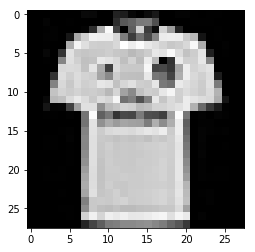

In [6]:
plt.imshow(dataset[0,1:].reshape(28,28),cmap='gray')
plt.show()

In [7]:
X, y = dataset[:, 1:], dataset[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8000, 784), (2000, 784), (8000,), (2000,))

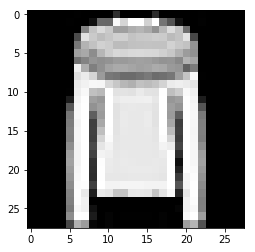

In [10]:
plt.imshow(X_train[0].reshape(28,28),cmap='gray')
plt.show()

In [11]:
y_train = np_utils.to_categorical(y_train)
y_test  = np_utils.to_categorical(y_test)

In [12]:
X_train, X_test = X_train.reshape((-1,28,28,1)), X_test.reshape((-1,28,28,1))

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 28, 28, 1), (2000, 28, 28, 1), (8000, 10), (2000, 10))

In [16]:
model=Sequential()

model.add(Conv2D(4,(3,3),input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))


model.add(Conv2D(8,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(100,activation='sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))
          
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 4)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 8)         296       
_________________________________________________________________
activation_3 (Activation)    (None, 11, 11, 8)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)               0         
__________

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
hist = model.fit(X_train, y_train,
          shuffle=True,
          batch_size=128,
          epochs=30,
          validation_data=(X_test, y_test)
         )

Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 1s 147us/step - loss: 1.6357 - acc: 0.5000 - val_loss: 1.1729 - val_acc: 0.6590
Epoch 2/30
8000/8000 [==============================] - 1s 141us/step - loss: 1.0268 - acc: 0.6847 - val_loss: 0.8503 - val_acc: 0.7410
Epoch 3/30
8000/8000 [==============================] - 1s 142us/step - loss: 0.8118 - acc: 0.7349 - val_loss: 0.7064 - val_acc: 0.7635
Epoch 4/30
8000/8000 [==============================] - 1s 144us/step - loss: 0.6927 - acc: 0.7636 - val_loss: 0.6123 - val_acc: 0.7940
Epoch 5/30
8000/8000 [==============================] - 1s 142us/step - loss: 0.6206 - acc: 0.7886 - val_loss: 0.5733 - val_acc: 0.8010
Epoch 6/30
8000/8000 [==============================] - 1s 142us/step - loss: 0.5728 - acc: 0.7976 - val_loss: 0.5323 - val_acc: 0.8120
Epoch 7/30
8000/8000 [==============================] - 1s 141us/step - loss: 0.5404 - acc: 0.8073 - val_loss: 0.5153 - val_acc: 0.8120


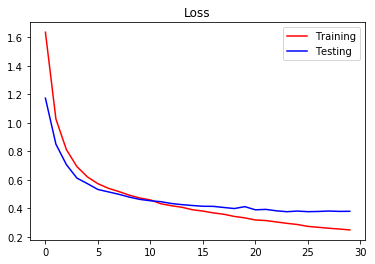

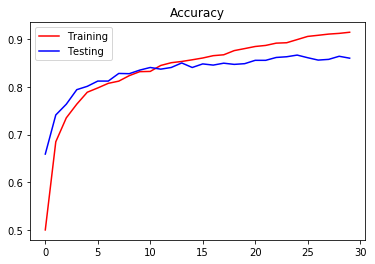

In [20]:
plt.figure(0)
plt.title("Loss")
plt.plot(hist.history['loss'], 'r', label='Training')
plt.plot(hist.history['val_loss'], 'b', label='Testing')
plt.legend()
plt.show()

plt.figure(1)
plt.title("Accuracy")
plt.plot(hist.history['acc'], 'r', label='Training')
plt.plot(hist.history['val_acc'], 'b', label='Testing')
plt.legend()
plt.show()